## Тестовое задание

ООО «Инком Транс» оператор железнодорожного подвижного состава, основным видом деятельности является предоставление собственных/арендованных крытых вагонов под перевозки промышленных грузов.

### Задание 1. Найти в любых доступных источниках (в т. ч. Интернет) информацию о конкурентах компании. Результат предоставить в свободной форме.

Перевозки в крытых вагонах разнородны по требованиям, срокам и ожиданиям грузовладельцев. В крытых вагонах перевозят большое количество грузов, перечень которых содержит несколько сотен позиций, соответственно и список грузоотправителей, которым необходимы крытые вагоны под перевозку своих грузов, также велик. 

Если надо отправить небольшую спотовую партию груза, грузоотправителю выгоднее пользоваться вагонами небольших операторов, которые смогут обеспечить приемлемую скорость подачи вагонов под погрузку. Когда речь идет о постоянных больших объемах перевозок, на первый план выходит способность оператора вывезти заявленный объем.

На транспортном рынке в сфере железнодорожных грузоперевозок работает большое количество операторов, оказывающие услуги перевозки грузов в крытых вагонах, такие, как РЖДЛ, Севертранском, Ранг, Магистраль, УралХимТранс, А-Транс, Сибирь Сервис Транс, Восход, РейлФрахтЛожистик, СЗТЛК, Трансстрой, РейлСпецТранс, Рейл континент, СКТО, Евросиб-ТС, РС-Транс, Логистика-1520 и другие.

Операторы, оказывающие услуги в одном и том же сегменте, могут работать как партнеры, в зависимости от запроса бизнеса - объемов, запланированных к перевозке, подвижного состава, подхода необходимого количества вагонов под погрузку, географии перевозки, необходимости промывки вагонов и т.д., когда даже при наличии достаточного количества собственного подвижного состава возникает необходимость в привлечении стороннего парка. В то же время, в зависимости от выбранной стратегии компании, могут конкурировать на определенных направлениях, площадках. 


### Задание 2. На основании приложенной статистики (крытые_тест.xlsx) определить перечень ТОП-игроков на рынке оперирования вагонами. Результат предоставить в свободной форме.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
import seaborn as sns
import re

Выгрузим таблицу и выведем на экран.
Рассмотрим данные и произведем предобработку данных.

In [2]:
data=pd.read_excel(r'C:\Users\bobro\OneDrive\Рабочий стол\Яндекс практикум\крытые_тест.xlsx')

In [3]:
data.head()

,дата,груз,группа грузов,станция отправления,дорога отправления,станция отправления РФ,дорога отправления РФ,станция назначения РФ,дорога назначения РФ,станция назначения,дорога назначения,оператор,плательщик,отправитель,получатель,собственник вагона,арендатор вагона,тип вагона,тонн,вагонов
0,2022-04-01,АГИДОЛ,ХИМИКАТЫ И СОДА,КОСЯКОВКА,КУЙБЫШЕВСКАЯ,КОСЯКОВКА,КУЙБЫШЕВСКАЯ,КРАСНОЕ (ЭКСП.),МОСКОВСКАЯ,РИМКАЙ,ЛИТОВСКАЯ,неизвестен,ООО МЕГА ШИППИНГ,NaN,нет данных,Skinest Rail AS,нет данных,крытые вагоны,48.380,1
1,2022-04-01,"АНТИФРИЗЫ, НЕ ПОИМЕНОВАННЫЕ В АЛФАВИТЕ",ХИМИКАТЫ И СОДА,ЗИЕМЕЛЬБЛАЗМА (ЭКСП.),ЛАТВИЙСКАЯ,ПОСИНЬ (РЗД) (ЭКСП.),ОКТЯБРЬСКАЯ,АКСАРАЙСКАЯ II (ЭКСП.) (РОССИЯ),ПРИВОЛЖСКАЯ,АКЖАЙЫК,КАЗАХСТАНСКИЕ,ООО ОмМет-ТРАНС,ООО АЛПА ЦЕНТРУМС,нет данных,нет данных,ОмМет-ТРАНС ООО,нет данных,крытые вагоны,4.000,1
2,2022-04-01,АРАХИС (ЗЕМЛЯНОЙ ОРЕХ),"КАРТОФЕЛЬ, ОВОЩИ И ФРУКТЫ",МЫТИЩИ,МОСКОВСКАЯ,МЫТИЩИ,МОСКОВСКАЯ,УСИНСК,СЕВЕРНАЯ,УСИНСК,СЕВЕРНАЯ,ООО Атлант,ООО Новые Технологии,NaN,NaN,ВЭБРФ,ООО АТЛАНТ,крытые вагоны,1.000,1
3,2022-04-01,БРИКЕТЫ ИЗ ОТХОДОВ ДРЕВЕСИНЫ,ОСТАЛЬНЫЕ И СБОРНЫЕ ГРУЗЫ,МУРАШИ,ГОРЬКОВСКАЯ,МУРАШИ,ГОРЬКОВСКАЯ,КРАСНОЕ (ЭКСП.),МОСКОВСКАЯ,РАДВИЛИШКИС,ЛИТОВСКАЯ,ООО ОмМет-ТРАНС,ООО Мурашинский фанерный завод,NaN,нет данных,ОмМет-ТРАНС ООО,нет данных,крытые вагоны,66.862,1
4,2022-04-01,БУМАГА ДЛЯ ПЕЧАТИ,БУМАГА,НИЗОВКА,СЕВЕРНАЯ,НИЗОВКА,СЕВЕРНАЯ,НОВОСИБИРСК-ЗАПАДНЫЙ,ЗАПАДНО-СИБИРСКАЯ,НОВОСИБИРСК-ЗАПАДНЫЙ,ЗАПАДНО-СИБИРСКАЯ,ООО РСТ,ООО Финтранс ГЛ,NaN,NaN,ГТЛК АО,ООО РСТ,крытые вагоны,63.279,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135819 entries, 0 to 135818
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   дата                    135819 non-null  datetime64[ns]
 1   груз                    135817 non-null  object        
 2   группа грузов           134169 non-null  object        
 3   станция отправления     134778 non-null  object        
 4   дорога отправления      134778 non-null  object        
 5   станция отправления РФ  135143 non-null  object        
 6   дорога отправления РФ   135143 non-null  object        
 7   станция назначения РФ   134230 non-null  object        
 8   дорога назначения РФ    134230 non-null  object        
 9   станция назначения      130479 non-null  object        
 10  дорога назначения       130479 non-null  object        
 11  оператор                132514 non-null  object        
 12  плательщик              134870

Всего файл содержит 135819 записей, 20 столбцов признаков (2 количественных, 17 категориальных и 1 временной). Для части столбцов видим наличие пропущенных значений.

In [5]:
data.columns

Index(['дата', 'груз', 'группа грузов', 'станция отправления',
       'дорога отправления', 'станция отправления РФ', 'дорога отправления РФ',
       'станция назначения РФ', 'дорога назначения РФ', 'станция назначения',
       'дорога назначения', 'оператор', 'плательщик', 'отправитель',
       'получатель', 'собственник вагона', 'арендатор вагона', 'тип вагона',
       'тонн', 'вагонов'],
      dtype='object')

In [6]:
data.describe()

,тонн,вагонов
count,135819.000000,135819.000000
mean,61.540853,1.029215
std,51.585786,0.888943
min,-59.380000,-16.000000
25%,47.000000,1.000000
50%,65.000000,1.000000
75%,67.000000,1.000000
max,3201.000000,54.000000


В столбцах 'тонн' и 'вагонов' есть аномальные минусовые значения.

Посмотрим количество пропусков.

In [7]:
data.isnull().sum()

дата                           0
груз                           2
группа грузов               1650
станция отправления         1041
дорога отправления          1041
станция отправления РФ       676
дорога отправления РФ        676
станция назначения РФ       1589
дорога назначения РФ        1589
станция назначения          5340
дорога назначения           5340
оператор                    3305
плательщик                   949
отправитель               113706
получатель                 99083
собственник вагона             0
арендатор вагона               0
тип вагона                     0
тонн                           0
вагонов                        0
dtype: int64

В столбце 'груз' 2 пропущенных значения или 0%. Удалим пропущенные.

In [8]:
data['груз'].isnull().sum()

2

In [9]:
def nan_ratio (column):
    return  print('Пропущено {:.1%}'.format(data[column].isna().value_counts()[1]/len(data),2) +  'значений')

In [10]:
nan_ratio('груз')

Пропущено 0.0%значений


In [11]:
data.dropna(subset=['груз'], inplace=True)

In [12]:
data['груз'].isna().value_counts()

False    135817
Name: груз, dtype: int64

В столбце 'группа грузов' пропущено 1648 значений или 1.2%. Пропущенные удаляем. Можно оставить пропуски или рассмотреть варианты замены пропусков корректными данными.

In [13]:
data['группа грузов'].isnull().sum()

1648

In [14]:
nan_ratio('группа грузов')

Пропущено 1.2%значений


In [15]:
data['группа грузов'].unique()

array(['ХИМИКАТЫ И СОДА', 'КАРТОФЕЛЬ, ОВОЩИ И ФРУКТЫ',
       'ОСТАЛЬНЫЕ И  СБОРНЫЕ ГРУЗЫ', 'БУМАГА', 'ОГНЕУПОРЫ',
       'ПРОМЫШЛЕННЫЕ ТОВАРЫ НАРОДНОГО ПОТРЕБЛЕНИЯ', 'СТРОИТЕЛЬНЫЕ ГРУЗЫ',
       'МЕТИЗЫ', 'ОСТАЛЬНЫЕ ПРОДОВОЛЬСТВЕННЫЕ ТОВАРЫ',
       'ПРОМЫШЛЕННОЕ СЫРЬЕ И ФОРМОВОЧНЫЕ МАТЕРИАЛЫ', 'ПРОДУКТЫ ПЕРЕМОЛА',
       'ЧЕРНЫЕ МЕТАЛЛЫ', 'ЛЕСНЫЕ ГРУЗЫ', 'ТОРФ И ТОРФЯНАЯ ПРОДУКЦИЯ',
       'НЕФТЬ И НЕФТЕПРОДУКТЫ', 'ЖМЫХИ', 'ЗЕРНО',
       'РУДА ЦВЕТНАЯ И СЕРНОЕ СЫРЬЕ',
       'ХИМИЧЕСКИЕ И МИНЕРАЛЬНЫЕ УДОБРЕНИЯ', 'МЕТАЛЛИЧЕСКИЕ КОНСТРУКЦИИ',
       'КОМБИКОРМА', 'МАШИНЫ И ОБОРУДОВАНИЕ', 'МЯСО И МАСЛО ЖИВОТНОЕ',
       'ЦЕМЕНТ', 'ЦВЕТНЫЕ МЕТАЛЛЫ, ИЗДЕЛИЯ ИЗ НИХ И ЛОМ ЦВ.МЕТАЛЛОВ',
       'РЫБА', 'САХАР', nan, 'СОЛЬ ПОВАРЕННАЯ', 'ФЛЮСЫ', 'АВТОМОБИЛИ',
       'СЕЛЬСКОХОЗЯЙСТВЕННЫЕ МАШИНЫ', 'ШЛАКИ ГРАНУЛИРОВАННЫЕ',
       'КАМЕННЫЙ УГОЛЬ', 'РУДА ЖЕЛЕЗНАЯ И МАРГАНЦЕВАЯ', 'СЛАНЦЫ ГОРЮЧИЕ',
       'ХЛОПОК', 'КОКС'], dtype=object)

In [16]:
data.dropna(subset=['группа грузов'], inplace=True)

In [17]:
data['группа грузов'].value_counts()

ОСТАЛЬНЫЕ ПРОДОВОЛЬСТВЕННЫЕ ТОВАРЫ                   20594
СТРОИТЕЛЬНЫЕ ГРУЗЫ                                   20470
ЛЕСНЫЕ ГРУЗЫ                                         11469
ПРОДУКТЫ ПЕРЕМОЛА                                     9891
БУМАГА                                                8714
ХИМИКАТЫ И СОДА                                       8354
ОСТАЛЬНЫЕ И  СБОРНЫЕ ГРУЗЫ                            6273
СОЛЬ ПОВАРЕННАЯ                                       5372
САХАР                                                 5087
ЦЕМЕНТ                                                5011
ПРОМЫШЛЕННЫЕ ТОВАРЫ НАРОДНОГО ПОТРЕБЛЕНИЯ             4632
ОГНЕУПОРЫ                                             4527
ПРОМЫШЛЕННОЕ СЫРЬЕ И ФОРМОВОЧНЫЕ МАТЕРИАЛЫ            3759
ЗЕРНО                                                 3378
МЕТИЗЫ                                                2770
ХИМИЧЕСКИЕ И МИНЕРАЛЬНЫЕ УДОБРЕНИЯ                    2648
ЧЕРНЫЕ МЕТАЛЛЫ                                        18

Основные группы перевозимых грузов: ОСТАЛЬНЫЕ ПРОДОВОЛЬСТВЕННЫЕ ТОВАРЫ - 20594, СТРОИТЕЛЬНЫЕ ГРУЗЫ - 20470, ЛЕСНЫЕ ГРУЗЫ - 11469, ПРОДУКТЫ ПЕРЕМОЛА - 9891, БУМАГА - 8714, ХИМИКАТЫ И СОДА - 8354, ОСТАЛЬНЫЕ И  СБОРНЫЕ ГРУЗЫ - 6273, СОЛЬ ПОВАРЕННАЯ - 5372, САХАР - 5087, САХАР - 5087.                              

Всего за рассмартиваемый период перевозились грузы из 37 групп грузов. Перевезенные грузы относятся к разным группам, компания не ориентируется на работу только с определенной группой грузов, а старается расширять число перевозимых позиций и, соответственно, количество грузоотправителей, осуществляющие перевозки в крытых вагонах.

In [18]:
data['группа грузов'].isna().value_counts()

False    134169
Name: группа грузов, dtype: int64

In [19]:
len(data['группа грузов'].value_counts())

37

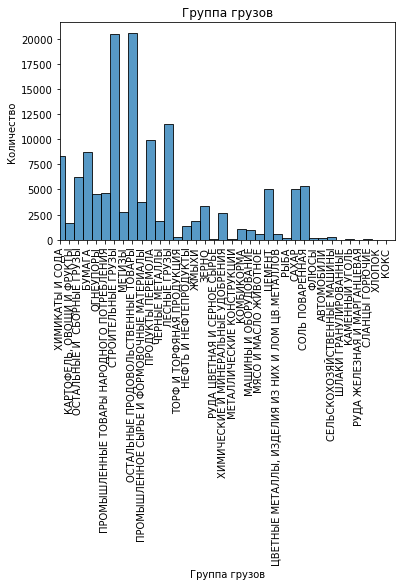

In [20]:
sns.histplot(data['группа грузов'], kde=False, bins=30)
plt.xlim(0,37)
plt.title('Группа грузов')
plt.xlabel('Группа грузов')
plt.xticks(rotation=90)
plt.ylabel('Количество')
plt.show()

Рассмотрим столбец 'оператор'. Пропуски составляют 3300 значений или 2.5%. Их удаляем. 

In [21]:
data['оператор'].isnull().sum()

3300

In [22]:
nan_ratio('оператор')

Пропущено 2.5%значений


In [23]:
data['оператор'].unique()

array(['неизвестен', 'ООО ОмМет-ТРАНС', 'ООО Атлант', 'ООО РСТ',
       'АО  Евросиб СПб-ТС', 'ООО ОТК', 'ООО Трио Экспресс',
       'Финтранс ГЛ', 'ЗАО ЛОКОТРАНС', 'ТТК-Транс', 'ООО Архбум',
       'ООО Уральская транспортная компания', 'ПТА', 'ООО Трансиндустрия',
       'АО Промсинтез', 'ООО ТК Транком-Сервис', 'ООО КузбассТрансЦемент',
       'ЖДК Транзит', 'РЖДЛ', 'АО Рефсервис', 'ООО Инпром', 'ООО ВДС',
       'ООО Грузовая компания', 'ОООВестКомТранс', 'ООО МТ-Груп',
       'ООО Рейл Актив Оператор', 'АО АСТОН', 'ООО Инком Транс',
       'ООО Кучуктерминал', 'АО РФЛ', 'ООО РЛ СЕРВИС',
       'ООО Балтстрой-Сервис', 'ООО ПромТэк', 'ВРК-1', 'ООО ТК МОТЕКС',
       'ООО ждИнвестиции', 'ООО А-Транс', 'Альфа Рэйл Экспорт',
       'ООО УРАЛХИМ-ТРАНС', 'Максима Логистик', 'ООО ТГ Транско',
       'РефТранс', 'ООО РС-ТРАНС', 'СРВ Транс', 'ООО ФТ Логистик',
       'ООО ТОЭК', 'ООО ИЛП-Груп', 'ООО ВЛТ групп', 'АО КХП Тихорецкий',
       'ТРАНСГЕО', 'ООО МТК', 'ООО Еврологистик', 'ООО Карг

In [24]:
data.dropna(subset=['оператор'], inplace=True)

In [25]:
data['оператор'].isna().value_counts()

False    130869
Name: оператор, dtype: int64

In [26]:
len(data['оператор'].value_counts())

556

In [27]:
data['оператор'].value_counts()

ООО АТЛАНТ           14993
ООО РСТ              10228
АО ЕВРОСИБ СПБ-ТС     9107
ЗАО ЛОКОТРАНС         6700
неизвестен            6433
                     ...  
ООО СТК МИНЕРАЛ          1
Эдем Транс ТОО           1
Rails World ТОО          1
ООО Р-Транс ТК           1
ООО НЕВА                 1
Name: оператор, Length: 556, dtype: int64

Выделим год перевозки. Рассматриваемый период - 2022 год.

In [28]:
data['year']=data['дата'].dt.year

In [29]:
data['year'].unique()

array([2022], dtype=int64)

Рассмотрим значения в столбце 'вагонов'. Есть выбивающиеся отрицательные значения, видимо, при выгрузке произошел технический сбой. Количество тонн в выведенных срезах данных, соответствующих аномальным значениям, тоже выглядят некорректно. Можно предположить, что большинство перевозок, где встречаются некорректные значения, относятся к воинским перевозкам на коммерческой основе, поэтому данные закрыты (воинские перевозки по форме осуществляют только несколько крупных компаний по прямому договору с ОАО "РЖД", поэтому предполагаю, что коммерческие). Также много некорректных значений в импортных/экспортных перевозках, в том числе и в других столбцах. 

Значения в столбце 'вагонов' равные 0 тоже некорректны, количество тонн, соответствующие данным значениям 0.55, 1, 2, 4 тонны. 

Строки с выбивающимися значениями удаляю.

In [30]:
data['вагонов'].unique()

array([  1,   2,   3,   0,  12,   4,  10,   9,   5,   7,  19,   8,   6,
        13,  -1,  24,  18,  15,  11,  17,  -9,  -3,  -2, -16,  14, -12,
        20,  16,  -5,  -7,  35,  28,  42,  54,  21,  22], dtype=int64)

In [31]:
data[(data.вагонов == 0)]

,дата,груз,группа грузов,станция отправления,дорога отправления,станция отправления РФ,дорога отправления РФ,станция назначения РФ,дорога назначения РФ,станция назначения,...,оператор,плательщик,отправитель,получатель,собственник вагона,арендатор вагона,тип вагона,тонн,вагонов,year
29,2022-04-01,БРИЗОЛ,СТРОИТЕЛЬНЫЕ ГРУЗЫ,КЛЕЩИХА,ЗАПАДНО-СИБИРСКАЯ,КЛЕЩИХА,ЗАПАДНО-СИБИРСКАЯ,БЛАГОВЕЩЕНСК,ЗАБАЙКАЛЬСКАЯ,БЛАГОВЕЩЕНСК,...,ООО Трио Экспресс,ООО Транспортная компания Мир,NaN,NaN,Трио ЭкспрессООО,нет данных,крытые вагоны,1.00,0,2022
43,2022-04-01,ВАРЕЖКИ-ПЕРЧАТКИ,ПРОМЫШЛЕННЫЕ ТОВАРЫ НАРОДНОГО ПОТРЕБЛЕНИЯ,НОВОСИБИРСК-ГЛАВНЫЙ,ЗАПАДНО-СИБИРСКАЯ,НОВОСИБИРСК-ГЛАВНЫЙ,ЗАПАДНО-СИБИРСКАЯ,ИРКУТСК-СОРТИРОВОЧНЫЙ,ВОСТОЧНО-СИБИРСКАЯ,ИРКУТСК-СОРТИРОВОЧНЫЙ,...,ООО Трансиндустрия,ООО ТРАНССЕРВИСИРКУТСК,NaN,NaN,ИП Митрофанов ВА,ООО ТрансИндустрия,крытые вагоны,0.55,0,2022
45,2022-04-01,ВЕРСТАКИ,ОСТАЛЬНЫЕ И СБОРНЫЕ ГРУЗЫ,НОВОСИБИРСК-ЗАПАДНЫЙ,ЗАПАДНО-СИБИРСКАЯ,НОВОСИБИРСК-ЗАПАДНЫЙ,ЗАПАДНО-СИБИРСКАЯ,ИРКУТСК-ПАССАЖИРСКИЙ,ВОСТОЧНО-СИБИРСКАЯ,ИРКУТСК-ПАССАЖИРСКИЙ,...,неизвестен,ООО ЖД-СЕРВИС СИБИРЬ,NaN,NaN,Р-ТРАНС ТК ООО,нет данных,крытые вагоны,4.00,0,2022
47,2022-04-01,ВИНА ВИНОГРАДНЫЕ,ОСТАЛЬНЫЕ ПРОДОВОЛЬСТВЕННЫЕ ТОВАРЫ,СОСНОГОРСК,СЕВЕРНАЯ,СОСНОГОРСК,СЕВЕРНАЯ,ПЕЧОРА,СЕВЕРНАЯ,ПЕЧОРА,...,неизвестен,ООО АЛЛЮР,NaN,NaN,Изотермическая логистика ООО,нет данных,крытые вагоны,1.00,0,2022
63,2022-04-01,ВЕРМИШЕЛЬ,ОСТАЛЬНЫЕ ПРОДОВОЛЬСТВЕННЫЕ ТОВАРЫ,НОВОСИБИРСК-ЗАПАДНЫЙ,ЗАПАДНО-СИБИРСКАЯ,НОВОСИБИРСК-ЗАПАДНЫЙ,ЗАПАДНО-СИБИРСКАЯ,ИРКУТСК-ПАССАЖИРСКИЙ,ВОСТОЧНО-СИБИРСКАЯ,ИРКУТСК-ПАССАЖИРСКИЙ,...,неизвестен,ООО ЖД-СЕРВИС СИБИРЬ,NaN,NaN,Р-ТРАНС ТК ООО,нет данных,крытые вагоны,2.00,0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135803,2022-07-28,"ФРУКТЫ СВЕЖИЕ, НЕ ПОИМЕНОВАННЫЕ В АЛФАВИТЕ","КАРТОФЕЛЬ, ОВОЩИ И ФРУКТЫ",СОСНОГОРСК,СЕВЕРНАЯ,СОСНОГОРСК,СЕВЕРНАЯ,ИНТА I,СЕВЕРНАЯ,ИНТА I,...,ЗАО ЛОКОТРАНС,ООО `АЛЛЮР`,NaN,NaN,нет данных,ЗАО ЛОКОТРАНС,крытые вагоны,2.00,0,2022
135804,2022-07-28,"ФРУКТЫ СВЕЖИЕ, НЕ ПОИМЕНОВАННЫЕ В АЛФАВИТЕ","КАРТОФЕЛЬ, ОВОЩИ И ФРУКТЫ",СОСНОГОРСК,СЕВЕРНАЯ,СОСНОГОРСК,СЕВЕРНАЯ,ПЕЧОРА,СЕВЕРНАЯ,ПЕЧОРА,...,АО РЕФСЕРВИС,ООО `АЛЛЮР`,NaN,NaN,ООО АЛЬФА-ЛИЗИНГ,АО РЕФСЕРВИС,крытые вагоны,1.00,0,2022
135805,2022-07-28,"ФРУКТЫ СВЕЖИЕ, НЕ ПОИМЕНОВАННЫЕ В АЛФАВИТЕ","КАРТОФЕЛЬ, ОВОЩИ И ФРУКТЫ",СОСНОГОРСК,СЕВЕРНАЯ,СОСНОГОРСК,СЕВЕРНАЯ,ПЕЧОРА,СЕВЕРНАЯ,ПЕЧОРА,...,ЗАО ЛОКОТРАНС,ООО `АЛЛЮР`,NaN,NaN,нет данных,ЗАО ЛОКОТРАНС,крытые вагоны,1.00,0,2022
135814,2022-07-28,ЧАЙ БАЙХОВЫЙ ЧЕРНЫЙ,ОСТАЛЬНЫЕ ПРОДОВОЛЬСТВЕННЫЕ ТОВАРЫ,СОСНОГОРСК,СЕВЕРНАЯ,СОСНОГОРСК,СЕВЕРНАЯ,ПЕЧОРА,СЕВЕРНАЯ,ПЕЧОРА,...,ЗАО ЛОКОТРАНС,ООО `АЛЛЮР`,NaN,NaN,нет данных,ЗАО ЛОКОТРАНС,крытые вагоны,2.00,0,2022


In [32]:
data[(data.вагонов < 0)]

,дата,груз,группа грузов,станция отправления,дорога отправления,станция отправления РФ,дорога отправления РФ,станция назначения РФ,дорога назначения РФ,станция назначения,...,оператор,плательщик,отправитель,получатель,собственник вагона,арендатор вагона,тип вагона,тонн,вагонов,year
2502,2022-04-03,"ПРОЧИЕ ГРУЗЫ, НЕ ПОИМЕНОВАННЫЕ В АЛФАВИТЕ",ОСТАЛЬНЫЕ И СБОРНЫЕ ГРУЗЫ,БАТАРЕЙНАЯ,ВОСТОЧНО-СИБИРСКАЯ,БАТАРЕЙНАЯ,ВОСТОЧНО-СИБИРСКАЯ,БРЯНСК-ЛЬГОВСКИЙ,МОСКОВСКАЯ,БРЯНСК-ЛЬГОВСКИЙ,...,неизвестен,000000000,NaN,NaN,ПГК ПАО,00000000,крытые вагоны,0.000000e+00,-1,2022
3328,2022-04-04,"ПРОЧИЕ ГРУЗЫ, НЕ ПОИМЕНОВАННЫЕ В АЛФАВИТЕ",ОСТАЛЬНЫЕ И СБОРНЫЕ ГРУЗЫ,УКТУС,СВЕРДЛОВСКАЯ,УКТУС,СВЕРДЛОВСКАЯ,СТРОЙКА,МОСКОВСКАЯ,СТРОЙКА,...,неизвестен,000000000,NaN,NaN,Альфа-Лизинг ООО,00000000,крытые вагоны,-4.925200e+01,-1,2022
5472,2022-04-05,"ЧАСТИ (ДЕТАЛИ) МАШИН, МЕХАНИЗМОВ И ОБОРУДОВАНИЯ",МАШИНЫ И ОБОРУДОВАНИЕ,ГАГАРСКИЙ,СВЕРДЛОВСКАЯ,ГАГАРСКИЙ,СВЕРДЛОВСКАЯ,БАТАРЕЙНАЯ,ВОСТОЧНО-СИБИРСКАЯ,БАТАРЕЙНАЯ,...,неизвестен,000000000,NaN,NaN,ПГК ПАО,00000000,крытые вагоны,0.000000e+00,-1,2022
6383,2022-04-06,"ФЛЯГИ МЕТАЛЛИЧЕКИЕ, НЕ ПОИМЕНОВАННЫЕ В АЛФАВИТЕ",МЕТИЗЫ,БЕКЕТОВСКАЯ,ПРИВОЛЖСКАЯ,БЕКЕТОВСКАЯ,ПРИВОЛЖСКАЯ,РОСТОВ-ЗАПАДНЫЙ,СЕВЕРО-КАВКАЗСКАЯ,РОСТОВ-ЗАПАДНЫЙ,...,РЖДЛ,000000000,NaN,NaN,ПГК ПАО,00000000,крытые вагоны,-4.235000e+00,-1,2022
6590,2022-04-06,"ФЛЯГИ МЕТАЛЛИЧЕКИЕ, НЕ ПОИМЕНОВАННЫЕ В АЛФАВИТЕ",МЕТИЗЫ,БЕКЕТОВСКАЯ,ПРИВОЛЖСКАЯ,БЕКЕТОВСКАЯ,ПРИВОЛЖСКАЯ,РОСТОВ-ЗАПАДНЫЙ,СЕВЕРО-КАВКАЗСКАЯ,РОСТОВ-ЗАПАДНЫЙ,...,неизвестен,000000000,NaN,NaN,ПГК ПАО,00000000,крытые вагоны,-1.226000e+00,-1,2022
8448,2022-04-08,МАСЛО ПОДСОЛНЕЧНОЕ,ОСТАЛЬНЫЕ ПРОДОВОЛЬСТВЕННЫЕ ТОВАРЫ,ЕФРЕМОВ,МОСКОВСКАЯ,ЕФРЕМОВ,МОСКОВСКАЯ,ОЗИНКИ (ЭКСП.),ПРИВОЛЖСКАЯ,ХАМЗА,...,АО Евросиб СПб-ТС,ООО Каргилл,NaN,нет данных,СПЖТ АО,нет данных,крытые вагоны,-5.938000e+01,-1,2022
8515,2022-04-08,"МОЛОКО ВСЯКОЕ, НЕ ПОИМЕНОВАННОЕ В АЛФАВИТЕ",ОСТАЛЬНЫЕ И СБОРНЫЕ ГРУЗЫ,ПЕТРОПАВЛОВСК,ЮЖНО-УРАЛЬСКАЯ,ПЕТРОПАВЛОВСК,ЮЖНО-УРАЛЬСКАЯ,ПЕТРОПАВЛОВСК (ЭКСП.),ЮЖНО-УРАЛЬСКАЯ,УРАЛЬСК,...,неизвестен,Филиал ТОО МАСЛО-ДЕЛ город Петропавловск,NaN,нет данных,UNIVERSAL LOGISTICS (Универсал Логистикс) TOO,00000000,крытые вагоны,0.000000e+00,-1,2022
11492,2022-04-13,"ДРОЖЖИ КОРМОВЫЕ (ГИДРОЛИЗНЫЕ, СУЛЬФАТНЫЕ)",ЖМЫХИ,СЫЗРАНЬ 1,КУЙБЫШЕВСКАЯ,СЫЗРАНЬ 1,КУЙБЫШЕВСКАЯ,КАНИСАЙ-Э(Р),ЮЖНО-УРАЛЬСКАЯ,САЛАР,...,неизвестен,ООО Транзит Сервис,NaN,нет данных,Казтемиртранс АО,нет данных,крытые вагоны,0.000000e+00,-1,2022
11783,2022-04-13,ИЗДЕЛИЯ ИЗ ЧЕРНЫХ МЕТАЛЛОВ ПРОИЗВОДСТВЕННОГО Н...,МЕТИЗЫ,ЧИТА 1,ЗАБАЙКАЛЬСКАЯ,ЧИТА 1,ЗАБАЙКАЛЬСКАЯ,ХАБАРОВСК 2,ДАЛЬНЕВОСТОЧНАЯ,ХАБАРОВСК 2,...,неизвестен,Главный материальный склад - обособленная стру...,NaN,NaN,инвентарный парк,нет данных,крытые вагоны,0.000000e+00,-1,2022
12623,2022-04-14,ВЗРЫВЧАТЫЕ МАТЕРИАЛЫ,ОСТАЛЬНЫЕ И СБОРНЫЕ ГРУЗЫ,ЭЛЬБАН,ДАЛЬНЕВОСТОЧНАЯ,ЭЛЬБАН,ДАЛЬНЕВОСТОЧНАЯ,УСПЕНСКАЯ,СЕВЕРО-КАВКАЗСКАЯ,УСПЕНСКАЯ,...,неизвестен,000000000,NaN,NaN,ПГК ПАО,00000000,крытые вагоны,0.000000e+00,-9,2022


In [33]:
data.drop(data.index[data['вагонов']<=0],inplace=True)

In [34]:
data['вагонов'].unique()

array([ 1,  2,  3, 12,  4, 10,  9,  5,  7, 19,  8,  6, 13, 24, 18, 15, 11,
       17, 14, 20, 16, 35, 28, 42, 54, 21, 22], dtype=int64)

In [35]:
data['вагонов'].count()

110081

In [36]:
data[(data.тонн <= 0)]

,дата,груз,группа грузов,станция отправления,дорога отправления,станция отправления РФ,дорога отправления РФ,станция назначения РФ,дорога назначения РФ,станция назначения,...,оператор,плательщик,отправитель,получатель,собственник вагона,арендатор вагона,тип вагона,тонн,вагонов,year


В столце 'оператор' есть неявные дубликаты. Производим замену на корректные названия.

In [37]:
data['оператор']=data['оператор'].replace('АО  Евросиб СПб-ТС','АО ЕВРОСИБ СПБ-ТС')
data['оператор']=data['оператор'].replace('Финтранс ГЛ','ООО ФИНТРАНС ГЛ')
data['оператор']=data['оператор'].replace('ООО Уральская транспортная компания','ООО УРАЛЬСКАЯ ТРАНСПОРТНАЯ КОМПАНИЯ')
data['оператор']=data['оператор'].replace('ПТА','ООО ПТА')
data['оператор']=data['оператор'].replace('АО Рефсервис','АО РЕФСЕРВИС')
data['оператор']=data['оператор'].replace('ООО Атлант','ООО АТЛАНТ')
data['оператор']=data['оператор'].replace('Дагнус ООО','ООО Дагнус')

Выведем срез с данными, где оператор 'неизвестен', видимо, технический сбой при выгрузке данных ГВЦ, часть из которых импорт/экспорт. Причины пропусков требуют более глубокого анализа. Эти значения удаляю, так как 'неизвестных' операторов 4870 значений и они могут повлиять на итоговые выводы, тем более, что часть данных где оператор был неизвестен, уже были удалены ранее, где рассматривались значения в столбце 'вагонов'.

In [49]:
data[(data.оператор == 'неизвестен')]

,дата,груз,группа грузов,станция отправления,дорога отправления,станция отправления РФ,дорога отправления РФ,станция назначения РФ,дорога назначения РФ,станция назначения,...,плательщик,отправитель,получатель,собственник вагона,арендатор вагона,тип вагона,тонн,вагонов,year,month
0,2022-04-01,АГИДОЛ,ХИМИКАТЫ И СОДА,КОСЯКОВКА,КУЙБЫШЕВСКАЯ,КОСЯКОВКА,КУЙБЫШЕВСКАЯ,КРАСНОЕ (ЭКСП.),МОСКОВСКАЯ,РИМКАЙ,...,ООО МЕГА ШИППИНГ,NaN,нет данных,Skinest Rail AS,нет данных,крытые вагоны,48.380,1,2022,April
7,2022-04-01,АРАХИС (ЗЕМЛЯНОЙ ОРЕХ),"КАРТОФЕЛЬ, ОВОЩИ И ФРУКТЫ",МЫТИЩИ,МОСКОВСКАЯ,МЫТИЩИ,МОСКОВСКАЯ,ВОРКУТА,СЕВЕРНАЯ,ВОРКУТА,...,ООО Новые Технологии,NaN,NaN,БелРефКарго ООО,нет данных,крытые вагоны,1.000,1,2022,April
13,2022-04-01,АЛЬБУМИН,ОСТАЛЬНЫЕ И СБОРНЫЕ ГРУЗЫ,ШКИРОТАВА,ЛАТВИЙСКАЯ,ПОСИНЬ (РЗД) (ЭКСП.),ОКТЯБРЬСКАЯ,КАНИСАЙ-Э(Р),ЮЖНО-УРАЛЬСКАЯ,СЕРГЕЛИ,...,ООО Диспетчер-Евразия,нет данных,нет данных,COTTON LOGISTICS ООО,нет данных,крытые вагоны,1.000,1,2022,April
19,2022-04-01,"БУМАГА, НЕ ПОИМЕНОВАННАЯ В АЛФАВИТЕ",БУМАГА,МЫТИЩИ,МОСКОВСКАЯ,МЫТИЩИ,МОСКОВСКАЯ,БРЯНСК-ЛЬГОВСКИЙ,МОСКОВСКАЯ,БРЯНСК-ЛЬГОВСКИЙ,...,Московская дирекция снабжения - структурное по...,NaN,NaN,инвентарный парк,нет данных,крытые вагоны,2.000,1,2022,April
23,2022-04-01,БРИКЕТЫ ИЗ ОТХОДОВ ДРЕВЕСИНЫ,ОСТАЛЬНЫЕ И СБОРНЫЕ ГРУЗЫ,КИРЕНГА,ВОСТОЧНО-СИБИРСКАЯ,КИРЕНГА,ВОСТОЧНО-СИБИРСКАЯ,НОВЫЙ ПОРТ (ЭКСП.),ОКТЯБРЬСКАЯ,НОВЫЙ ПОРТ (ЭКСП.),...,ООО Русфорест Магистральный,NaN,нет данных,ЮТАС РЕЙЛ 1520 ООО,нет данных,крытые вагоны,65.200,1,2022,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119653,2022-04-30,ПЛИТЫ ДРЕВЕСНОСТРУЖЕЧНЫЕ,ЛЕСНЫЕ ГРУЗЫ,Шакша,КУЙБЫШЕВСКАЯ,Шакша,КУЙБЫШЕВСКАЯ,КАРТ1-ЭК-РОС,ЮЖНО-УРАЛЬСКАЯ,МЕДЕУ,...,ООО БИЭЛ,NaN,нет данных,RailLeasing ТОО,00000000,крытые вагоны,67.279,1,2022,April
119667,2022-04-30,ПРОВОЛОКА СТАЛЬНАЯ (В ТОМ ЧИСЛЕ ПОКРЫТАЯ ДРУГИ...,ЧЕРНЫЕ МЕТАЛЛЫ,АБИНСКАЯ,СЕВЕРО-КАВКАЗСКАЯ,АБИНСКАЯ,СЕВЕРО-КАВКАЗСКАЯ,КРАСНОЕ (ЭКСП.),МОСКОВСКАЯ,БРЕСТ-ЦЕНТР (ЭКСП.),...,ООО Новосталь-М Логистик,NaN,нет данных,Казтемиртранс АО,нет данных,крытые вагоны,125.950,2,2022,April
119717,2022-04-30,"СОЛЬ ПОВАРЕННАЯ ""ЭКСТРА""",СОЛЬ ПОВАРЕННАЯ,КОЗЕНКИ,БЕЛОРУССКАЯ,ЗЛЫНКА (ЭКСП.),МОСКОВСКАЯ,ЛОБНЯ,МОСКОВСКАЯ,ЛОБНЯ,...,ООО Глория Центр,нет данных,NaN,инвентарный парк,нет данных,крытые вагоны,66.145,1,2022,April
119719,2022-04-30,"СОЛЬ ПОВАРЕННАЯ ""ЭКСТРА""",СОЛЬ ПОВАРЕННАЯ,КОЗЕНКИ,БЕЛОРУССКАЯ,ЗЛЫНКА (ЭКСП.),МОСКОВСКАЯ,ПИЛЬШИНО,МОСКОВСКАЯ,ПИЛЬШИНО,...,АО Альфа Транс,нет данных,NaN,инвентарный парк,нет данных,крытые вагоны,66.118,1,2022,April


In [50]:
data.drop(data.index[data['оператор']=='неизвестен'],inplace=True)

Выведем операторов по столбцу 'оператор', на которых приходится наибольшее количество перевозок: ООО АТЛАНТ -1510876.713 тн, 24002 вагона или 17.87% от общего числа перевозок; ООО РСТ - 855272.867 тн, 13986 вагонов или 10.42%; АО ЕВРОСИБ СПБ-ТС - 733112.818 тн, 12141 вагонов или 9.04%, ООО УРАЛЬСКАЯ ТРАНСПОРТНАЯ КОМПАНИЯ - 463332.870, 7642 вагонов или 6.05%, ООО ФИНТРАНС ГЛ - 367506.269 тн, 6090 вагонов или 4.83%.

In [51]:
data_operator = pd.DataFrame()
data_operator['оператор_тн'] = data.groupby('оператор')['тонн'].sum()
data_operator['оператор_ваг'] = data.groupby('оператор')['вагонов'].sum()
data_operator['оператор_%'] = round(data_operator['оператор_ваг']/data['вагонов'].sum()*100,2)
data_operator['оператор_ср'] = round(data_operator['оператор_тн'] / data_operator['оператор_ваг'],2)

data_operator.sort_values('оператор_ваг', ascending = False).head(10)

,оператор_тн,оператор_ваг,оператор_%,оператор_ср
оператор,,,,
ООО АТЛАНТ,1510876.713,24002,19.00,62.95
ООО РСТ,855272.867,13986,11.07,61.15
АО ЕВРОСИБ СПБ-ТС,733112.818,12141,9.61,60.38
ООО УРАЛЬСКАЯ ТРАНСПОРТНАЯ КОМПАНИЯ,463332.870,7642,6.05,60.63
ООО ФИНТРАНС ГЛ,367506.269,6096,4.83,60.29
ООО ПТА,316126.831,5076,4.02,62.28
АО РЕФСЕРВИС,146922.147,3100,2.45,47.39
Казтемиртранс АО,181120.000,2912,2.31,62.20
ЗАО ЛОКОТРАНС,135517.533,2536,2.01,53.44


Выведем операторов с наименьшим количеством перевозок - АОТВСЗ, ООО Омскуглерод, ООО Таскор-21, ООО Основание, MS Logistics TOO и др., которые перевезли за рассматриваемый период по 1 вагону, что составляет менее 0.01% от общего числа перевозок.

In [52]:
data_operator = pd.DataFrame()
data_operator['оператор_тн'] = data.groupby('оператор')['тонн'].sum()
data_operator['оператор_ваг'] = data.groupby('оператор')['вагонов'].sum()
data_operator['оператор_%'] = round(data_operator['оператор_ваг']/data['вагонов'].sum()*100,3)
data_operator['оператор_ср'] = round(data_operator['оператор_тн'] / data_operator['оператор_ваг'],2)

data_operator.sort_values('оператор_ваг').head(10)

,оператор_тн,оператор_ваг,оператор_%,оператор_ср
оператор,,,,
АОТВСЗ,71.854,1,0.001,71.85
ООО Омсктехуглерод,51.160,1,0.001,51.16
ООО Таскор-21,52.318,1,0.001,52.32
ООО Основание,58.998,1,0.001,59.00
MS Logistics ТОО,49.000,1,0.001,49.00
Rails World ТОО,53.000,1,0.001,53.00
АО Тулачермет,10.000,1,0.001,10.00
SIA VEGA STIVIDORS ООО,1.000,1,0.001,1.00
ЭВД ИСАКОГОРКА СЕВЕРНОЙ ДИ ЦДИ ОАО РЖД,30.000,1,0.001,30.00


Если вывести операторов с наименьшим количеством перевозок не по количеству вагонов, а перевезенным тоннам, здесь также прослеживаются выбивающиеся значения, которые требуют дополнительного анализа.

In [53]:
data_operator = pd.DataFrame()
data_operator['оператор_тн'] = data.groupby('оператор')['тонн'].sum()
data_operator['оператор_ваг'] = data.groupby('оператор')['вагонов'].sum()
data_operator['оператор_%'] = round(data_operator['оператор_ваг']/data['вагонов'].sum()*100,3)
data_operator['оператор_ср'] = round(data_operator['оператор_тн'] / data_operator['оператор_ваг'],2)
data_operator.sort_values('оператор_тн').head(10)

,оператор_тн,оператор_ваг,оператор_%,оператор_ср
оператор,,,,
SIA VEGA STIVIDORS ООО,1.0,1,0.001,1.0
Эксплуатационное вагонное депо Белогорск - фл ОАО,4.0,1,0.001,4.0
ФГУП ЗАВОД ИМЕНИ МОРОЗОВА,5.0,5,0.004,1.0
Bes Group ILS ТОО,8.0,1,0.001,8.0
АО Тулачермет,10.0,1,0.001,10.0
Голд Продукт АО,15.0,1,0.001,15.0
ПАО Моломский ЛХЗ,18.6,1,0.001,18.6
Андеса ЗАО,21.0,1,0.001,21.0
ЗАБАЙКАЛЬСКАЯ ДИРЕКЦИЯ ПО ЭНЕРГООБЕСПЕЧЕНИЮ ТРАНСЭ,21.0,3,0.002,7.0


In [54]:
data[(data.тонн < 25)]

,дата,груз,группа грузов,станция отправления,дорога отправления,станция отправления РФ,дорога отправления РФ,станция назначения РФ,дорога назначения РФ,станция назначения,...,плательщик,отправитель,получатель,собственник вагона,арендатор вагона,тип вагона,тонн,вагонов,year,month
1,2022-04-01,"АНТИФРИЗЫ, НЕ ПОИМЕНОВАННЫЕ В АЛФАВИТЕ",ХИМИКАТЫ И СОДА,ЗИЕМЕЛЬБЛАЗМА (ЭКСП.),ЛАТВИЙСКАЯ,ПОСИНЬ (РЗД) (ЭКСП.),ОКТЯБРЬСКАЯ,АКСАРАЙСКАЯ II (ЭКСП.) (РОССИЯ),ПРИВОЛЖСКАЯ,АКЖАЙЫК,...,ООО АЛПА ЦЕНТРУМС,нет данных,нет данных,ОмМет-ТРАНС ООО,нет данных,крытые вагоны,4.0,1,2022,April
2,2022-04-01,АРАХИС (ЗЕМЛЯНОЙ ОРЕХ),"КАРТОФЕЛЬ, ОВОЩИ И ФРУКТЫ",МЫТИЩИ,МОСКОВСКАЯ,МЫТИЩИ,МОСКОВСКАЯ,УСИНСК,СЕВЕРНАЯ,УСИНСК,...,ООО Новые Технологии,NaN,NaN,ВЭБРФ,ООО АТЛАНТ,крытые вагоны,1.0,1,2022,April
9,2022-04-01,БАНКИ СТЕКЛЯННЫЕ НОВЫЕ,ПРОМЫШЛЕННЫЕ ТОВАРЫ НАРОДНОГО ПОТРЕБЛЕНИЯ,КЛЕЩИХА,ЗАПАДНО-СИБИРСКАЯ,КЛЕЩИХА,ЗАПАДНО-СИБИРСКАЯ,БЛАГОВЕЩЕНСК,ЗАБАЙКАЛЬСКАЯ,БЛАГОВЕЩЕНСК,...,ООО Транспортная компания Мир,NaN,NaN,ОТК ООО,нет данных,крытые вагоны,1.0,1,2022,April
10,2022-04-01,БАНКИ СТЕКЛЯННЫЕ НОВЫЕ,ПРОМЫШЛЕННЫЕ ТОВАРЫ НАРОДНОГО ПОТРЕБЛЕНИЯ,КЛЕЩИХА,ЗАПАДНО-СИБИРСКАЯ,КЛЕЩИХА,ЗАПАДНО-СИБИРСКАЯ,БЛАГОВЕЩЕНСК,ЗАБАЙКАЛЬСКАЯ,БЛАГОВЕЩЕНСК,...,ООО Транспортная компания Мир,NaN,NaN,Трио ЭкспрессООО,нет данных,крытые вагоны,1.0,1,2022,April
22,2022-04-01,"АППАРАТЫ, МАШИНЫ, ПРИБОРЫ И ИНСТРУМЕНТЫ РАЗЛИЧ...",МЕТИЗЫ,СОСНОГОРСК,СЕВЕРНАЯ,СОСНОГОРСК,СЕВЕРНАЯ,УСИНСК,СЕВЕРНАЯ,УСИНСК,...,ООО АЛЛЮР,NaN,NaN,ИВТЕРМОС ООО,ЗАО ЛОКОТРАНС,крытые вагоны,1.0,1,2022,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135690,2022-07-28,ГРУНТ (ЗЕМЛЯ ОБЫКНОВЕННАЯ),СТРОИТЕЛЬНЫЕ ГРУЗЫ,МЫТИЩИ,МОСКОВСКАЯ,МЫТИЩИ,МОСКОВСКАЯ,ЛАБЫТНАНГИ,СЕВЕРНАЯ,ЛАБЫТНАНГИ,...,ООО Офис-Сервис,NaN,NaN,АО ЗЕСТ,ООО РТ,крытые вагоны,1.0,1,2022,July
135698,2022-07-28,"ИЗДЕЛИЯ КОНДИТЕРСКИЕ МУЧНЫЕ, НЕ ПОИМЕНОВАННЫЕ ...",ОСТАЛЬНЫЕ ПРОДОВОЛЬСТВЕННЫЕ ТОВАРЫ,МОНИНО,МОСКОВСКАЯ,МОНИНО,МОСКОВСКАЯ,НИЖНЕВАРТОВСК 1,СВЕРДЛОВСКАЯ,НИЖНЕВАРТОВСК 1,...,ООО ДелТрансЛогистик,NaN,NaN,ВЭБ.РФ,ООО АТЛАНТ,крытые вагоны,1.0,1,2022,July
135714,2022-07-28,МАТЕРИАЛЫ НЕТКАНЫЕ,ПРОМЫШЛЕННЫЕ ТОВАРЫ НАРОДНОГО ПОТРЕБЛЕНИЯ,САМАРА,КУЙБЫШЕВСКАЯ,САМАРА,КУЙБЫШЕВСКАЯ,ОБСКАЯ,СЕВЕРНАЯ,ОБСКАЯ,...,ООО ГК,NaN,NaN,АО ГТЛК,ООО РСТ,крытые вагоны,23.0,1,2022,July
135816,2022-07-28,"ЧАСТИ МАШИН СЕЛЬСКОХОЗЯЙСТВЕННЫХ, НЕ ПОИМЕНОВА...",СЕЛЬСКОХОЗЯЙСТВЕННЫЕ МАШИНЫ,РОСТОВ-ТОВАРНЫЙ,СЕВЕРО-КАВКАЗСКАЯ,РОСТОВ-ТОВАРНЫЙ,СЕВЕРО-КАВКАЗСКАЯ,БАРНАУЛ,ЗАПАДНО-СИБИРСКАЯ,БАРНАУЛ,...,ООО Комбайновый завод Ростсельмаш,NaN,NaN,нет данных,нет данных,крытые вагоны,10.0,1,2022,July


Можно проследить динамику по месяцу перевозки.

In [56]:
data['month']=data['дата'].dt.month

In [58]:
month_=data.pivot_table(index='month', values='вагонов',
                                          aggfunc=['sum','count'])
month_.columns=['sum', 'count']
month_

,sum,count
month,,
4,33905,28285
5,32871,27454
6,32356,26847
7,27164,22625


Наблюдается снижение количества перевозок по месяцам. Самая низкая погрузка - в июле, самая высокая - в апреле.

<AxesSubplot:xlabel='month'>

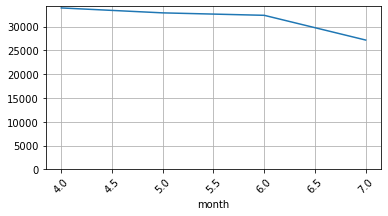

In [59]:
data.groupby(['month'])['вагонов'].sum().plot(grid=True,figsize=(6,3),rot=45,ylim=0)

***Выводы:***

*Основные группы перевозимых грузов: ОСТАЛЬНЫЕ ПРОДОВОЛЬСТВЕННЫЕ ТОВАРЫ - 20594, СТРОИТЕЛЬНЫЕ ГРУЗЫ - 20470, ЛЕСНЫЕ ГРУЗЫ - 11469, ПРОДУКТЫ ПЕРЕМОЛА - 9891, БУМАГА - 8714, ХИМИКАТЫ И СОДА - 8354, ОСТАЛЬНЫЕ И СБОРНЫЕ ГРУЗЫ - 6273, СОЛЬ ПОВАРЕННАЯ - 5372, САХАР - 5087, САХАР - 5087. Всего за рассмартиваемый период перевозились грузы из 37 групп грузов. Перевезенные грузы относятся к разным группам, компания не ориентируется на работу только с определенной группой грузов, а старается расширять число перевозимых позиций и, соответственно, количество грузоотправителей, осуществляющие перевозки в крытых вагонах.*

*В столбце 'вагонов' есть выбивающиеся отрицательные значения, видимо, при выгрузке произошел технический сбой. Количество тонн в выведенных срезах данных, соответствующих аномальным значениям, тоже выглядят некорректно. Можно предположить, что большинство перевозок, где встречаются некорректные значения, относятся к воинским перевозкам на коммерческой основе, поэтому данные закрыты (воинские перевозки по форме осуществляют только несколько крупных компаний по прямому договору с ОАО "РЖД", поэтому предполагаю, что коммерческие). Также много некорректных значений в импортных/экспортных перевозках, в том числе и в других столбцах. Значения в столбце 'вагонов' равные 0 тоже некорректны, количество тонн, соответствующие данным значениям 0.55, 1, 2, 4 тонны. Строки с выбивающимися значениями удалены.*

*Существуют значения, где оператор 'неизвестен', видимо, технический сбой при выгрузке данных ГВЦ, часть из которых импорт/экспорт. Причины пропусков требуют более глубокого анализа. Эти значения удалены, так как 'неизвестных' операторов 4870 значений и они могут повлиять на итоговые выводы, тем более, что часть данных где оператор был неизвестен, были удалены при рассмотрении значений в столбце 'вагонов'.*

*Операторы, на которых приходится наибольшее количество перевозок: ООО АТЛАНТ -1510876.713 тн, 24002 вагона или 17.87% от общего числа перевозок; ООО РСТ - 855272.867 тн, 13986 вагонов или 10.42%; АО ЕВРОСИБ СПБ-ТС - 733112.818 тн, 12141 вагонов или 9.04%, ООО УРАЛЬСКАЯ ТРАНСПОРТНАЯ КОМПАНИЯ - 463332.870, 7642 вагонов или 6.05%, ООО ФИНТРАНС ГЛ - 367506.269 тн, 6090 вагонов или 4.83%.*

*Операторы, на которых приходится наименьшее количество перевозок - АОТВСЗ, ООО Омскуглерод, ООО Таскор-21, ООО Основание, MS Logistics TOO и др., которые перевезли за рассматриваемый период по 1 вагону, что составляет менее 0.01% от общего числа перевозок.*

*Если рассматривать операторов с наименьшим количеством перевозок не по количеству вагонов, а перевезенным тоннам, здесь также прослеживаются выбивающиеся значения, которые требуют дополнительного анализа.*

*Наблюдается снижение количества перевозок по месяцам. Самая низкая погрузка - в июле, самая высокая - в апреле.*